# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# to see response and get what we need from json
from pprint import pprint


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 570


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = query_url + city
    response = requests.get(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s \t| %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        # How to convert this dt to human readable format:
        # https://stackoverflow.com/a/75223545
        # and what is the origin: https://openweathermap.org/current
        # and https://www.unixtimestamp.com/
        # eg: pd.to_datetime(1697130302, unit='s',origin='1970-1-1')

        # Append the City information into city_data list
        city_data.append(
            {
                "City": city, 
                "Lat": city_lat, 
                "Lng": city_lng, 
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            }
        )

    # If an error is experienced, skip the city
    except:
        print(f"City not found. Skipping...\t| {city}")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 	| puerto carreno
Processing Record 2 of Set 1 	| tiksi
Processing Record 3 of Set 1 	| adamstown
Processing Record 4 of Set 1 	| francisco sa
Processing Record 5 of Set 1 	| tuy hoa
Processing Record 6 of Set 1 	| weno
Processing Record 7 of Set 1 	| hermanus
Processing Record 8 of Set 1 	| kapa'a
Processing Record 9 of Set 1 	| grytviken
Processing Record 10 of Set 1 	| keflavik
Processing Record 11 of Set 1 	| mizdah
Processing Record 12 of Set 1 	| constantia
Processing Record 13 of Set 1 	| yanykurgan
Processing Record 14 of Set 1 	| edinburgh of the seven seas
Processing Record 15 of Set 1 	| west island
Processing Record 16 of Set 1 	| pochinok
Processing Record 17 of Set 1 	| la sarre
Processing Record 18 of Set 1 	| ishigaki
Processing Record 19 of Set 1 	| mariehamn
Processing Record 20 of Set 1 	| bredasdorp
Processing Record 21 of Set 1 	| aktau
Processing Record 22 of Set 1 	| gadzhiye

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [5]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto carreno,6.1890,-67.4859,34.99,52,40,1.03,CO,1697139517
1,tiksi,71.6872,128.8694,-5.07,96,100,4.66,RU,1697139517
2,adamstown,-25.0660,-130.1015,20.58,73,96,5.73,PN,1697139488
3,francisco sa,-16.4758,-43.4883,35.08,16,0,3.53,BR,1697139517
4,tuy hoa,13.0833,109.3000,24.28,93,97,2.39,VN,1697139517


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto carreno,6.1890,-67.4859,34.99,52,40,1.03,CO,1697139517
1,tiksi,71.6872,128.8694,-5.07,96,100,4.66,RU,1697139517
2,adamstown,-25.0660,-130.1015,20.58,73,96,5.73,PN,1697139488
3,francisco sa,-16.4758,-43.4883,35.08,16,0,3.53,BR,1697139517
4,tuy hoa,13.0833,109.3000,24.28,93,97,2.39,VN,1697139517


### Create the Scatter Plots Requested


In [8]:
# Define function to build these scatterplots
def this_scatter(x_col, y_col, df, xlabel, ylabel, title, ax):
    
    ax.scatter(
        x=x_col,
        y=y_col,
        data=df,
        alpha=0.75,
        edgecolors='black',
        label='Data points'
    )


    # Incorporate the other graph properties
    ax.set_xlabel(xlabel, fontdict={'weight': 700})
    ax.set_ylabel(ylabel, fontdict={'weight': 700})
    # how to get today's date: https://stackoverflow.com/a/60234593
    ax.set_title(
    f"{title} ({time.strftime('%Y-%m-%d')})",
    fontdict={'weight': 700, 'size': 14}
    )

    ax.grid(True)
    ax.set_axisbelow(True)
    plt.tight_layout()
    
    



#### Latitude Vs. Temperature

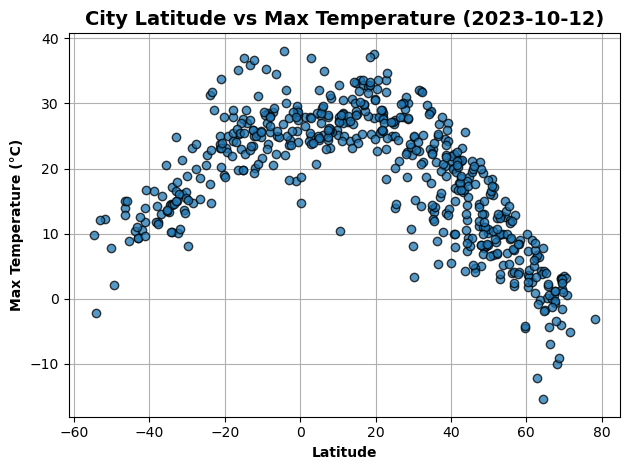

In [9]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots()

this_scatter(
    x_col='Lat',
    y_col='Max Temp',
    df=city_data_df,
    xlabel='Latitude',
    ylabel='Max Temperature (°C)',
    title='City Latitude vs Max Temperature',
    ax=ax
)

# Save the figure
fig.savefig('output_data/Fig1.png')

# Show plot
plt.show()


#### Latitude Vs. Humidity

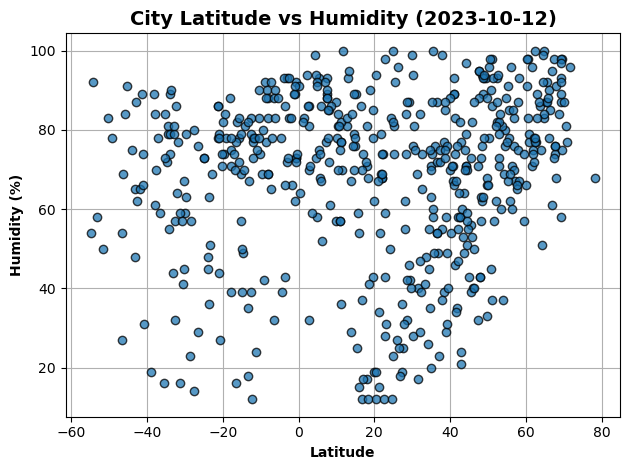

In [10]:
# Build the scatter plots for latitude vs. humidity
fig, ax = plt.subplots()

this_scatter(
    x_col='Lat',
    y_col='Humidity',
    df=city_data_df,
    xlabel='Latitude',
    ylabel='Humidity (%)',
    title='City Latitude vs Humidity',
    ax=ax
)

# Save the figure
fig.savefig('output_data/Fig2.png')

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

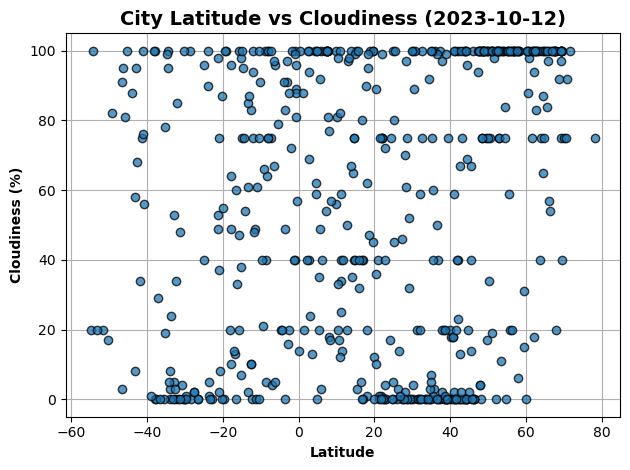

In [11]:
# Build the scatter plots for latitude vs. cloudiness
fig, ax = plt.subplots()

this_scatter(
    x_col='Lat',
    y_col='Cloudiness',
    df=city_data_df,
    xlabel='Latitude',
    ylabel='Cloudiness (%)',
    title='City Latitude vs Cloudiness',
    ax=ax
)

# Save the figure
fig.savefig('output_data/Fig3.png')

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

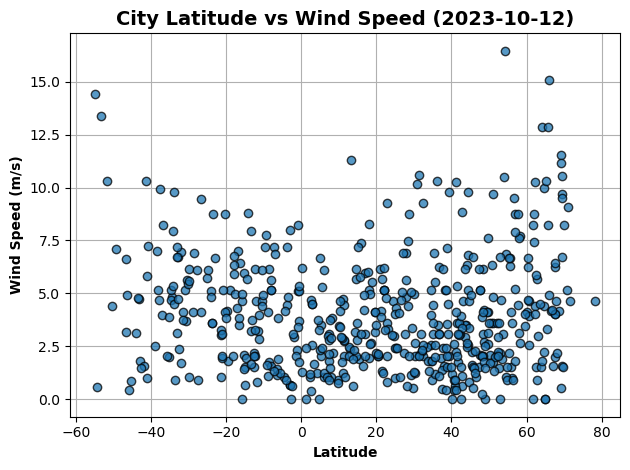

In [12]:
# Build the scatter plots for latitude vs. wind speed
fig, ax = plt.subplots()

this_scatter(
    x_col='Lat',
    y_col='Wind Speed',
    df=city_data_df,
    xlabel='Latitude',
    ylabel='Wind Speed (m/s)',
    title='City Latitude vs Wind Speed',
    ax=ax
)

# Save the figure
fig.savefig('output_data/Fig4.png')

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def this_linregress(x_col, y_col, df, xlabel, ylabel, title):

    # Define x and y values
    x_values = df[x_col]
    y_values = df[y_col]

    # Calculate the linear regression model
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


    fig, ax = plt.subplots()
    # plot points as scatterplot
    this_scatter(
        x_col=x_col,
        y_col=y_col,
        df=df,
        xlabel=xlabel,
        ylabel=ylabel,
        title=title,
        ax=ax
    )
    # Add the linear regression line
    plt.plot(
        x_values,
        regress_values,
        '-',
        color='darkred',
        label='Linear regression line'
    )

    plt.annotate(
        text=line_eq,
        xy=(.2,.3),
        xycoords='figure fraction',
        fontsize=12,
        color='darkred',
        backgroundcolor=(1, 1, 1, 0.5)
    )
    # Print r-value
    print(f"The r-value is: {rvalue}")

    # Add a text label with the r-value
    plt.annotate(
        text=f"r-value: {rvalue:.2f}",
        xy=(.2,.25),
        xycoords='figure fraction',
        fontstyle='italic',
        fontsize=10,
        backgroundcolor=(1, 1, 1, 0.5)
    )
    
    # Add legend
    plt.legend(loc='lower left')

    plt.show()
    
    


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.copy().loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto carreno,6.1890,-67.4859,34.99,52,40,1.03,CO,1697139517
1,tiksi,71.6872,128.8694,-5.07,96,100,4.66,RU,1697139517
4,tuy hoa,13.0833,109.3000,24.28,93,97,2.39,VN,1697139517
5,weno,7.4515,151.8468,27.97,89,100,3.09,FM,1697139517
7,kapa'a,22.0752,-159.3190,28.60,68,75,5.14,US,1697139518


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.copy().loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,20.58,73,96,5.73,PN,1697139488
3,francisco sa,-16.4758,-43.4883,35.08,16,0,3.53,BR,1697139517
6,hermanus,-34.4187,19.2345,14.59,81,100,4.82,ZA,1697139491
8,grytviken,-54.2811,-36.5092,-2.11,92,100,0.59,GS,1697139518
13,edinburgh of the seven seas,-37.0676,-12.3116,12.98,78,29,4.00,SH,1697139489


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8450585918278515


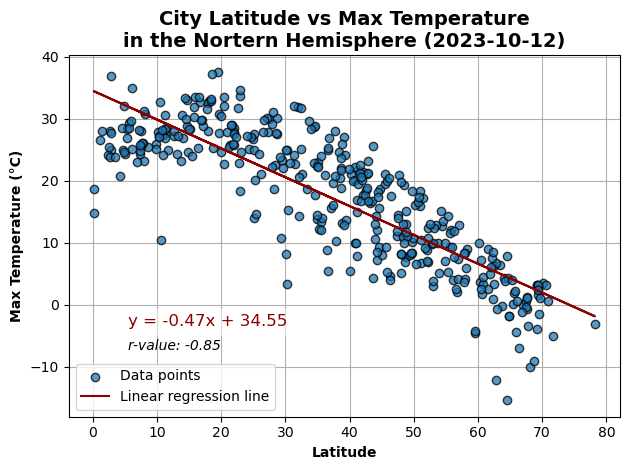

In [16]:
# Linear regression on Northern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Max Temp',
    df=northern_hemi_df,
    xlabel='Latitude',
    ylabel='Max Temperature (°C)',
    title='City Latitude vs Max Temperature\nin the Nortern Hemisphere',
)


The r-value is: 0.7962569281286648


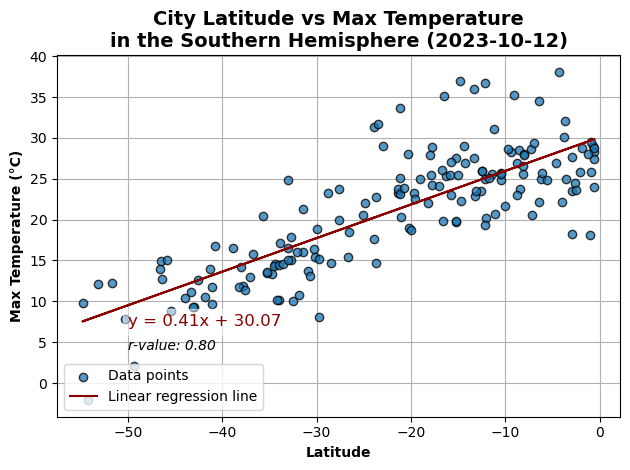

In [17]:
# Linear regression on Southern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Max Temp',
    df=southern_hemi_df,
    xlabel='Latitude',
    ylabel='Max Temperature (°C)',
    title='City Latitude vs Max Temperature\nin the Southern Hemisphere',
)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18440901448312938


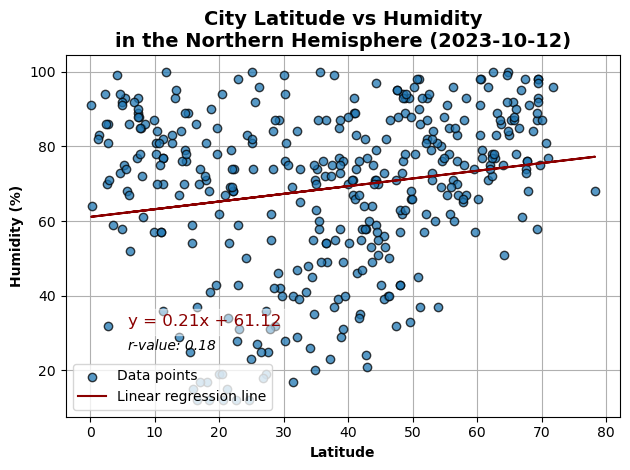

In [18]:
# Northern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Humidity',
    df=northern_hemi_df,
    xlabel='Latitude',
    ylabel='Humidity (%)',
    title='City Latitude vs Humidity\nin the Northern Hemisphere',
)


The r-value is: 0.1785591613610009


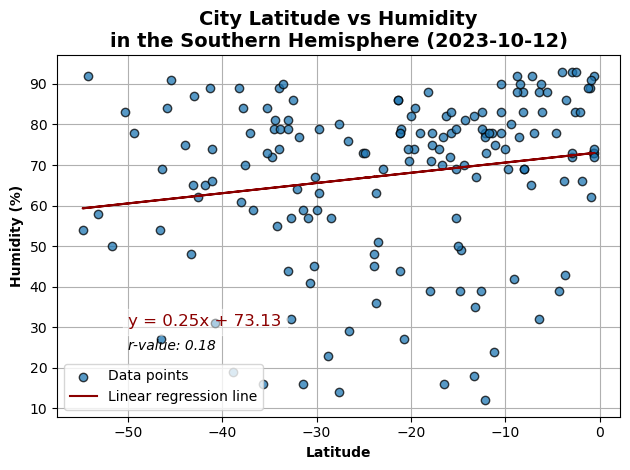

In [19]:
# Southern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Humidity',
    df=southern_hemi_df,
    xlabel='Latitude',
    ylabel='Humidity (%)',
    title='City Latitude vs Humidity\nin the Southern Hemisphere',
)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.25598121021789266


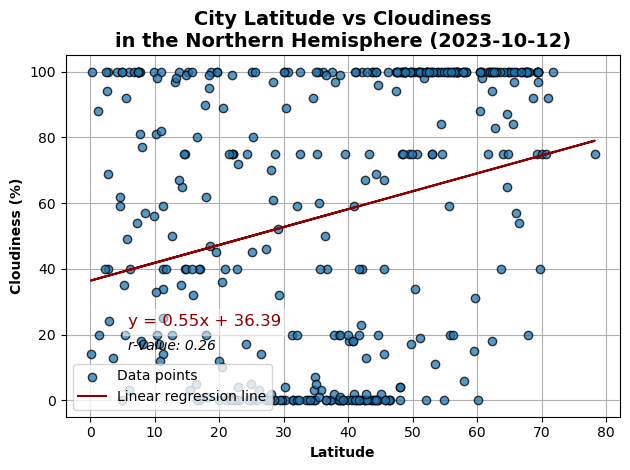

In [20]:
# Northern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Cloudiness',
    df=northern_hemi_df,
    xlabel='Latitude',
    ylabel='Cloudiness (%)',
    title='City Latitude vs Cloudiness\nin the Northern Hemisphere',
)


The r-value is: 0.1785591613610009


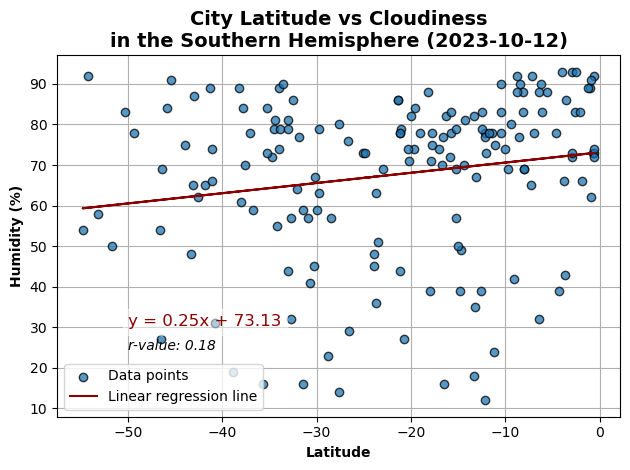

In [21]:
# Southern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Humidity',
    df=southern_hemi_df,
    xlabel='Latitude',
    ylabel='Humidity (%)',
    title='City Latitude vs Cloudiness\nin the Southern Hemisphere',
)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.24040064460022983


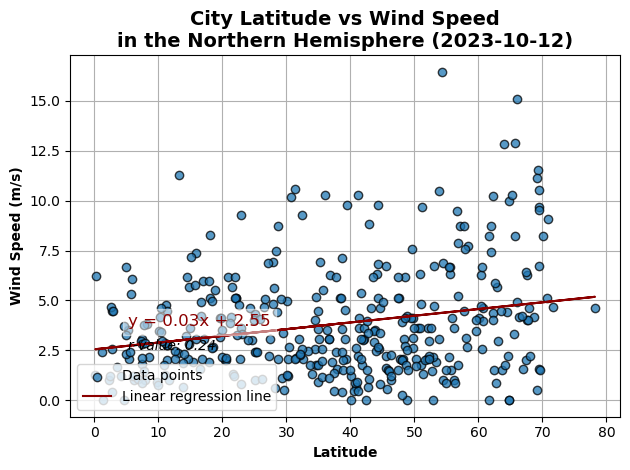

In [22]:
# Northern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Wind Speed',
    df=northern_hemi_df,
    xlabel='Latitude',
    ylabel='Wind Speed (m/s)',
    title='City Latitude vs Wind Speed\nin the Northern Hemisphere',
)


The r-value is: -0.26175512387349376


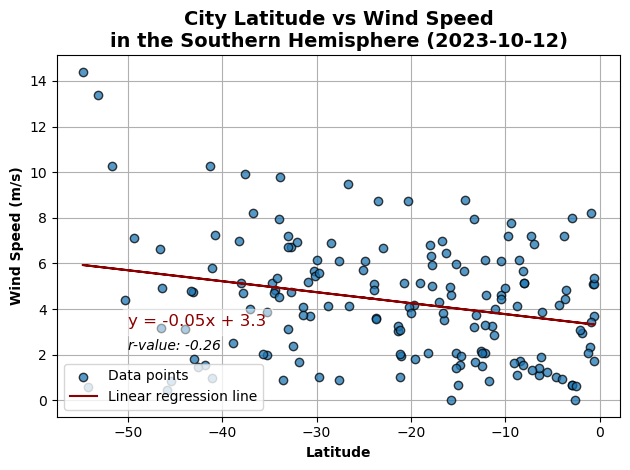

In [23]:
# Southern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Wind Speed',
    df=southern_hemi_df,
    xlabel='Latitude',
    ylabel='Wind Speed (m/s)',
    title='City Latitude vs Wind Speed\nin the Southern Hemisphere',
)


**Discussion about the linear relationship:** YOUR RESPONSE HERE